<a href="https://colab.research.google.com/github/FahruddinZaimIbrahim/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

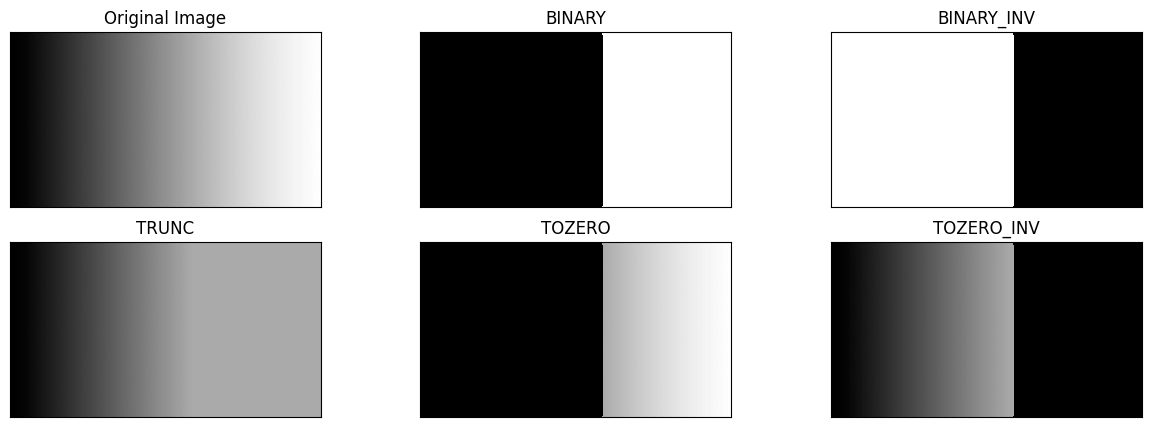

In [5]:
from google.colab.patches import cv2_imshow

filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)

thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))

for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

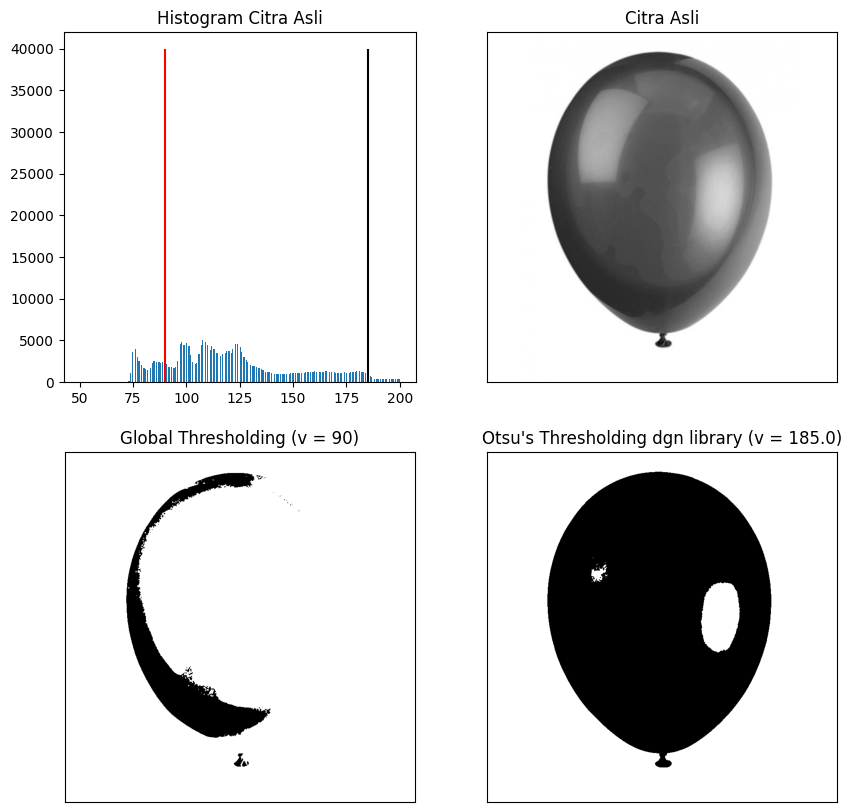

In [7]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/Images/balloon.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)

thresh = 90

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')

for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

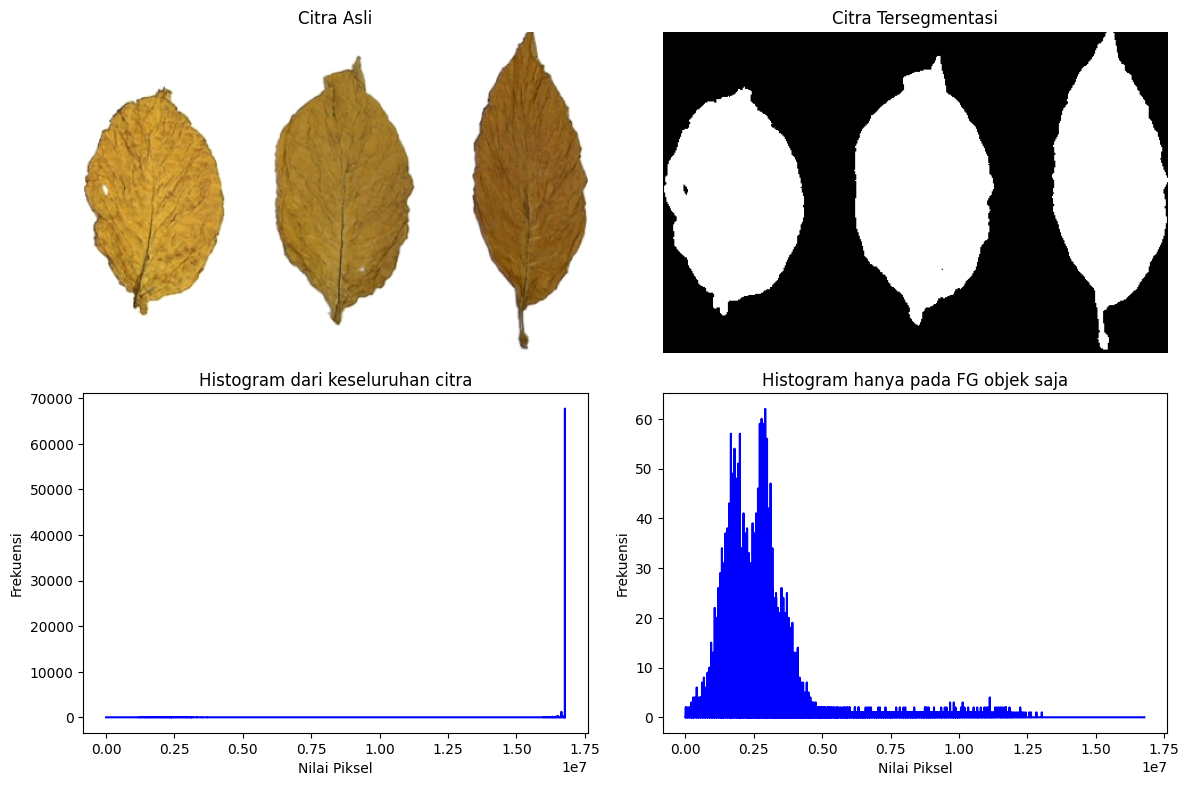

In [17]:
# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/tobacco.jpg')

# Konversi ke RGB (OpenCV membaca dalam BGR)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi ke grayscale untuk segmentasi
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Lakukan thresholding untuk mendapatkan mask
_, mask = cv.threshold(gray, 200, 255, cv.THRESH_BINARY_INV)

# Plot gambar asli dan hasil segmentasi
plt.figure(figsize=(12, 8))

# Plot citra asli
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

# Plot hasil segmentasi
plt.subplot(222)
plt.imshow(mask, cmap='gray')
plt.title('Citra Tersegmentasi')
plt.axis('off')

# Hitung dan plot histogram
# Histogram untuk keseluruhan citra
hist_full = cv.calcHist([img], [0,1,2], None, [256,256,256], [0,256,0,256,0,256])

# Histogram hanya untuk foreground (objek)
hist_mask = cv.calcHist([img], [0,1,2], mask, [256,256,256], [0,256,0,256,0,256])

# Plot untuk histogram keseluruhan citra
plt.subplot(223)
plt.plot(hist_full.ravel(), color='blue')
plt.title('Histogram dari keseluruhan citra')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')

# Plot untuk histogram foreground
plt.subplot(224)
plt.plot(hist_mask.ravel(), color='blue')
plt.title('Histogram hanya pada FG objek saja')
plt.xlabel('Nilai Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

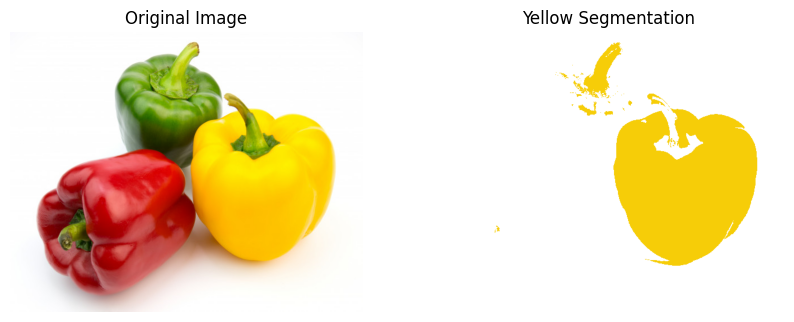

In [41]:
# Load image
image = cv.imread('/content/drive/MyDrive/PCVK/Images/peppers.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = image_rgb.reshape((-1, 3))

# Convert to float for KMeans
pixels = np.float32(pixels)

# Define criteria and apply KMeans
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters (you can adjust this number based on the image complexity)
_, labels, centers = cv.kmeans(pixels, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 (RGB color values)
centers = np.uint8(centers)

# Map the labels back to the original image size
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_rgb.shape)

# Define the range for yellow color in RGB
lower_yellow = np.array([200, 200, 0], dtype="uint8")
upper_yellow = np.array([255, 255, 150], dtype="uint8")

# Create a mask for yellow color
mask = cv.inRange(segmented_image, lower_yellow, upper_yellow)

# Create a white background
background = np.ones_like(image_rgb, dtype=np.uint8) * 255

# Combine the segmented yellow area with white background
yellow_only_with_white_bg = np.where(mask[:, :, None] == 255, segmented_image, background)

# Plot the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Yellow Segmentation")
plt.imshow(yellow_only_with_white_bg)
plt.axis("off")

plt.show()


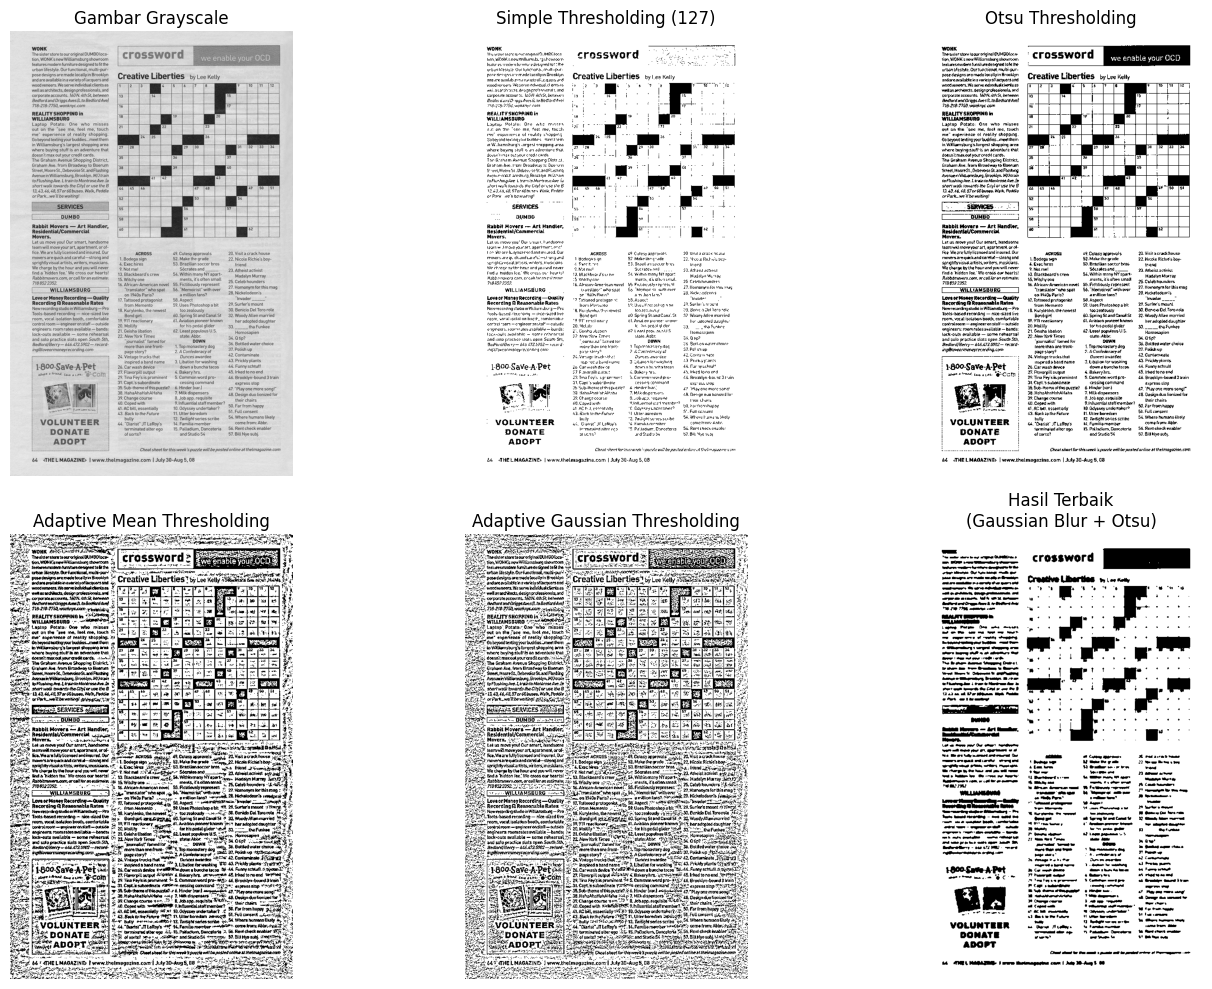

True

In [34]:
# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/crossword.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Coba beberapa metode thresholding
_, binary_simple = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
_, binary_otsu = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
adaptive_mean = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
adaptive_gaussian = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

# Tampilkan hasil
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(gray, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

plt.subplot(232)
plt.imshow(binary_simple, cmap='gray')
plt.title('Simple Thresholding (127)')
plt.axis('off')

plt.subplot(233)
plt.imshow(binary_otsu, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')

plt.subplot(234)
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholding')
plt.axis('off')

plt.subplot(235)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')
plt.axis('off')

# Implementasi thresholding terbaik dengan pre-processing
# Gunakan Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(gray, (5, 5), 0)
_, binary_best = cv.threshold(blurred, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.subplot(236)
plt.imshow(binary_best, cmap='gray')
plt.title('Hasil Terbaik\n(Gaussian Blur + Otsu)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil terbaik
cv.imwrite('crossword_threshold_best.jpg', binary_best)